In [46]:
pip install pytrends matplotlib pandas seaborn plotly numpy

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq #We use from pytrends.request import TrendReq to access Google Trends data programmatically using the Pytrends library, which is an unofficial API for Google Trends.

#### Setup Pytrend library and defining keyword

### Write a code where just changing by the keyword we can search for multiple things ?

In [50]:
pytrends = TrendReq(hl = 'en-US', tz = 360) #it helps to send request  hl stands for(language) and tz stands for (time zone)
keyword = 'deep learning' #just defining the keyword we can change it accoriding to the need of user anytime

#### Data Request   why? ANS: To know about the keyword from google trends

In [52]:
pytrends.build_payload([keyword] , cat=0 , timeframe = 'today 12-m' , geo='', gprop='', )
# 1-cat = category and = 0 means every category,
# 2-timeframe= today 12-m means last 12 months
# 3-geo='' is indicating that we need the data globally not from a specific region
# 4-gprop='' indicates that we need the data of only google search not from any other platform that we can acces through google

### Finding out the top 15 countries that serach that keyword most and also represent it visually ?

##### country wise interest

In [60]:
region_data = pytrends.interest_by_region() #interest_by_region is used to find trends region wise
region_data = region_data.sort_values(by = keyword,ascending = False ).head(15) #sorting the data in region_data var in descending order

## BAR GRAPH

C:\Users\Anas\AppData\Local\Temp\ipykernel_25344\2638484663.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




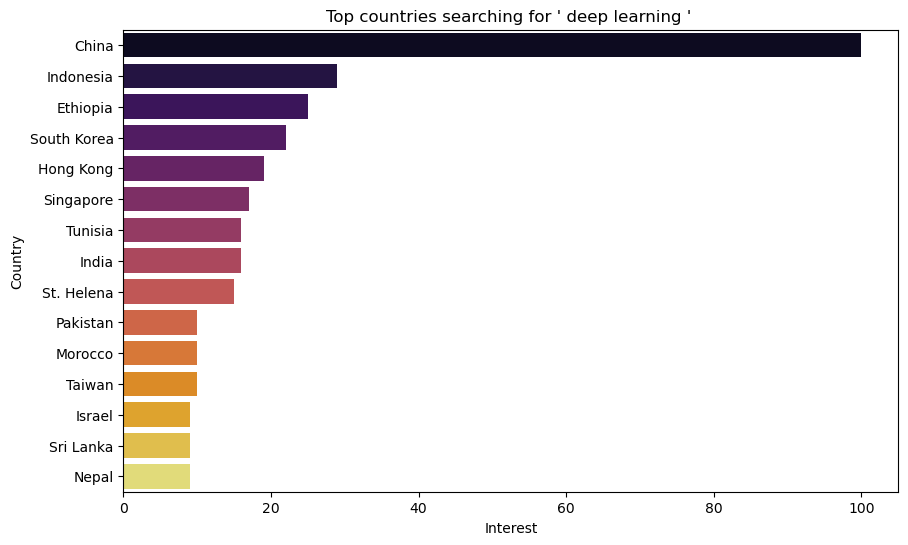

In [63]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword] , y = region_data.index , palette='inferno')
plt.title(f"Top countries searching for ' {keyword} ' ")
plt.xlabel('Interest')
plt.ylabel('Country')
plt.show()

### Making world map of top 15 countries that searched that keyword

## World Map

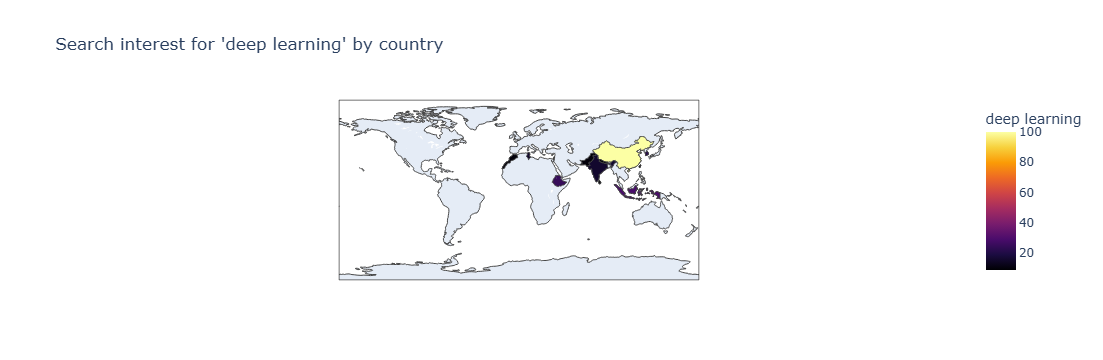

In [67]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations = 'geoName',
                    locationmode = 'country names',
                    color = keyword,
                    title = f"Search interest for '{keyword}' by country",
                    color_continuous_scale = 'Inferno')
fig.show()

### Extracting the time wise interest of the Keyword and how it trended in different years 

### Time Wise Interest

In [71]:
time_df = pytrends.interest_over_time()

C:\Users\Anas\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



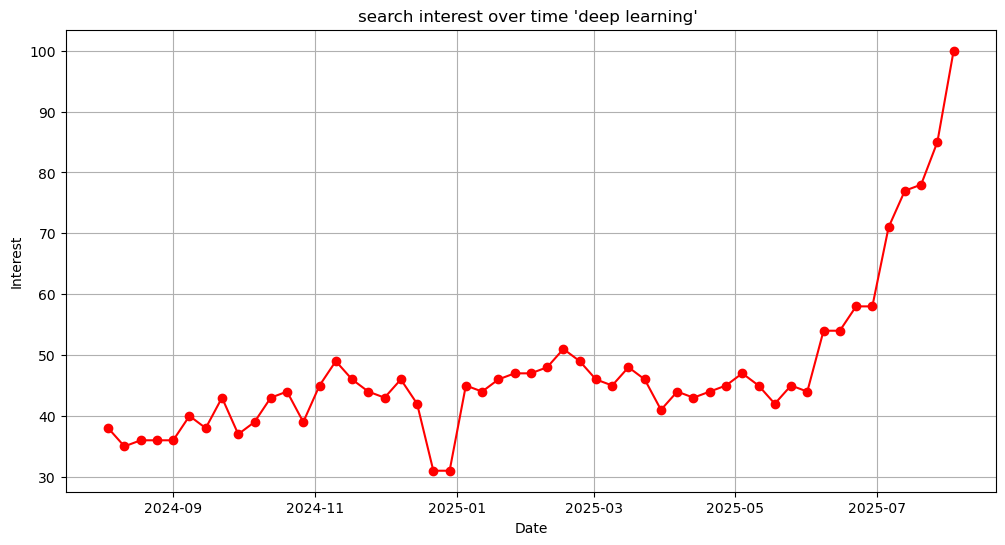

In [73]:
plt.figure(figsize = (12,6))
plt.plot(time_df.index , time_df[keyword] , marker = 'o' , color = 'red' )
plt.title(f"search interest over time '{keyword}' " )
plt.xlabel('Date')
plt.ylabel('Interest')
plt.grid(True)
plt.show()

### Comparing related keywords and plotting the graph

## Multiple Keywords Comparison

In [81]:
kwords = ['deep learning' , 'data science' , 'machine learning']
pytrends.build_payload(kwords , cat = 0 , timeframe = 'today 12-m' , geo = '' , gprop = '') 

C:\Users\Anas\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



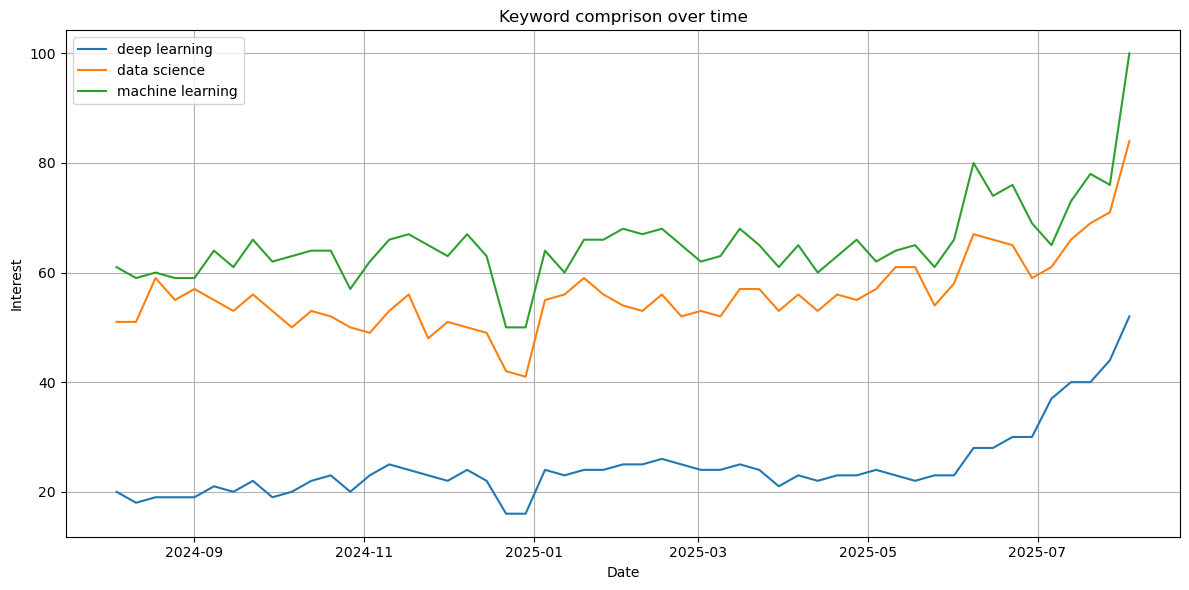

In [83]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize = (12,6))
for i in kwords:
    plt.plot(compare_df.index , compare_df[i] , label = i)

plt.title('Keyword comprison over time')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()